<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/1_2_Supervised_Learning_with_scikit_learn_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-2 Supervised Learning with scikit-learn - Regression

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [2]:
plt.style.use('ggplot')

## Data

### Diabetes

In [3]:
data_url = 'https://drive.google.com/uc?id=147311XR5gBBU7zRpI4qEvAOO4jr54pG-'

diabetes = pd.read_csv(data_url)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Sales

In [5]:
data_url = 'https://drive.google.com/uc?id=1epKx_DwEzXp5esptpfwnTK6ZDjm35HXk'

sales = pd.read_csv(data_url)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


## Introduction to regression

- The target variable is continuous

### Creating feature and target arrays

- Using `glucose` as the target variable

#### Cleaning

In [6]:
# this matches the dataset used in the video
diabetes_clean = diabetes[(diabetes['bmi'] > 0) & (diabetes['glucose'] > 0)]
diabetes_clean.shape

(752, 9)

In [7]:
X = diabetes_clean.drop('glucose', axis=1)
y = diabetes_clean['glucose']

In [8]:
X.head()

,pregnancies,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,72,35,0,33.6,0.627,50,1
1,1,66,29,0,26.6,0.351,31,0
2,8,64,0,0,23.3,0.672,32,1
3,1,66,23,94,28.1,0.167,21,0
4,0,40,35,168,43.1,2.288,33,1


In [9]:
y.head()

,glucose
0,148
1,85
2,183
3,89
4,137


### Make predictions from a single feature

In [10]:
X_bmi = X[['bmi']]
X_bmi.shape, y.shape

((752, 1), (752,))

### Plotting glucose vs. body mass index

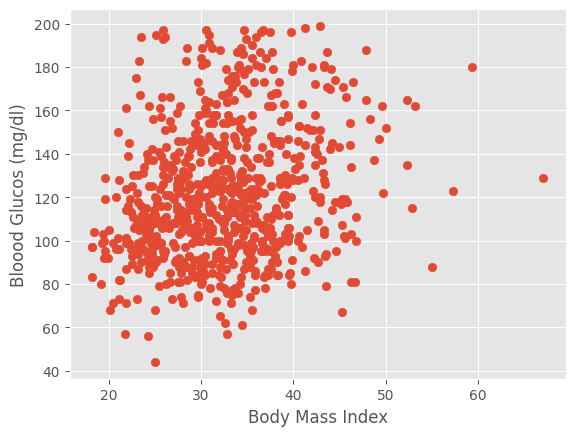

In [11]:
plt.scatter(X_bmi, y)

plt.ylabel('Bloood Glucos (mg/dl)')
plt.xlabel('Body Mass Index')

plt.show()

### Fit a regression model

In [12]:
reg = LinearRegression()

reg.fit(X_bmi, y)

LinearRegression()

In [13]:
predictions = reg.predict(X_bmi)
predictions.shape

(752,)

In [14]:
reg.coef_

array([1.02801737])

In [15]:
reg.intercept_

88.57754093395482

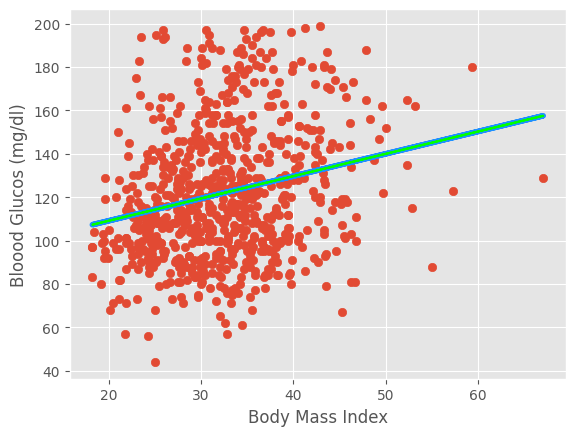

In [16]:
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='dodgerblue', linewidth=4)
plt.plot(X_bmi, X_bmi * reg.coef_ + reg.intercept_, color='lime')

plt.ylabel('Bloood Glucos (mg/dl)')
plt.xlabel('Body Mass Index')

plt.show()

### Creating features

In [17]:
X = sales[['radio']]
y = sales['sales']
X.shape, y.shape

((4546, 1), (4546,))

### Building a linear regression model

In [18]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [19]:
predictions = reg.predict(X)
predictions

array([ 95491.17119147, 117829.51038393, 173423.38071499, ...,
       206147.61403088, 187204.93183873, 174094.31771993])

### Visualizing a linear regression model

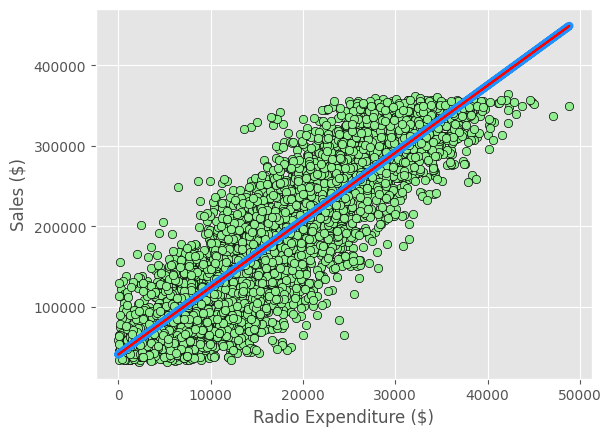

In [20]:
plt.scatter(X, y, color='lightgreen', edgecolor='black')

plt.plot(X, predictions, color='dodgerblue', linewidth=6)
plt.plot(X, X * reg.coef_ + reg.intercept_, color='red')

plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

plt.show()

## The basics of linear regression

### Regression mechanics

- Simple linear regression uses one feature
  - $y = ax + b$
- How do we choose $a$ and $b$
  - Define an error function (aka loss function or cost function) for any given line
  - Choose the line that minimizes the error function

### Ordinary Least Squares (OLS)

- $RSS$: Residual Sum of Squares
- Ordinary Least Squares (OLS): minimize $RSS$

$$
RSS = \sum_{i=1}^{n}\left(y_{i} - \widehat{y}_{i}\right)^{2}
$$

### Linear regression in higher dimensions: Multiple Linear Regression

$$y = a_1x_1 + a_2x_2 + ... + a_nx_n + b$$

### Linear regression using all features

```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
```

### R-squared

- R-squared, $R^{2}$, is the default metric for linear regression
- $R^{2}$ quantifies the variance in target values explained by the features
  - Values reange from 0 to 1
- $RSS$ is the sum of squares of residuals
- $TSS$ is the total sum of squares

$$
\begin{align}
R^{2} &= 1 - \frac{RSS}{TSS} \\
&= 1 - \frac{\sum\left(y_i - \widehat{y}_{i}\right)^2}{\sum\left(y_i - \bar{y}_{i}\right)^2}
\end{align}
$$

<img src="https://drive.google.com/uc?id=1HfhXmwgxBMHKVZSgCUtdEKM9gO3c17Gm" alt="Google Drive Image" />

To compute $R^2$ with scikit-learn:

```python
reg_all.score(X_test, y_test)
```

### Mean squared error and root mean squared error

- An alternative to $R^2$

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}\left(y_i - \widehat{y}_{i}\right)^2
$$

- MSE is measured in target units, squared

$$
RMSE = \sqrt{MSE}
$$

- RMSE is measured in the same units and the target variable

To calculate RMSE in scikit-learn

```python
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared = False)
```

### Fit and predict for regression

In [21]:
X = sales.drop(['influencer', 'sales'], axis=1)
y = sales['sales']

X.shape, y.shape

((4546, 3), (4546,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3182, 3), (1364, 3), (3182,), (1364,))

In [23]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = reg.predict(X_test)

y_pred[:2], y_test[:2].values

(array([53176.66154234, 70996.19873235]), array([55261.28, 67574.9 ]))

### Regression Performance

In [25]:
r_squared = reg.score(X_test, y_test)
r_squared

0.9990152104759368

In [26]:
# manual calculation of R-squared
RSS = np.sum((y_test - y_pred) ** 2)
TSS = np.sum(((y_test - y_test.mean()) ** 2))

1 - (RSS/TSS)

0.9990152104759368

In [27]:
rmse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(rmse)
rmse

2944.4331996001

In [28]:
# mean_squared_error(y_test, y_pred, squared=False)

# TypeError: got an unexpected keyword argument 'squared'

In [29]:
# manual calculation of rmse

np.sqrt(sum((y_test - y_pred) ** 2) / len(y_test))

2944.4331996000988

### Cross-validation

#### Cross-validation motivation

- Model performance is dependent on the way we split the data
- Not representative of the model's ability to generalize to unseen data
- Called k-fold cross-validtion
- Too many folds is computationally expensive

```python
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)

reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf
```


In [30]:
X = sales.drop(['tv', 'influencer', 'sales'], axis=1)
y = sales['sales']

X.shape, y.shape

((4546, 2), (4546,))

In [31]:
X.head()

,radio,social_media
0,6566.23,2907.98
1,9237.76,2409.57
2,15886.45,2913.41
3,30020.03,6922.30
4,8437.41,1406.00


In [32]:
kf = KFold(n_splits=6, shuffle=True, random_state=5)
reg = LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv=kf)
cv_scores

array([0.74451678, 0.77241887, 0.76842114, 0.7410406 , 0.75170022,
       0.74406484])

In [33]:
cv_scores.mean()

0.7536937414361207

In [34]:
cv_scores.std()

0.012305389070474664

In [35]:
np.quantile(cv_scores, [0.025, 0.975])

array([0.74141863, 0.77191916])

## Regularized Regression

### Why regularize?

- Recall: Linear regression minimizes a loss function
- It chooses coefficients and an intercept
- Large coefficients can lead to overfitting
- Regularization: Penalize large coefficients

### Ridge regression

$$
\text{Loss function} = \text{OLS loss function} + \alpha\:*\:\sum_{i=1}^{n}a_{i}^{2}
$$